In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from numpy import loadtxt
import pandas as pd
import os
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.visualization import simple_norm

In [ ]:
from google.colab import auth
auth.authenticate_user()
!gcloud config set project sfhs-333010

Updated property [core/project].


In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   123k      0 --:--:-- --:--:-- --:--:--  123k
OK
61 packages can be upgraded. Run 'apt list --upgradable' to see them.
gcsfuse is already the newest version (0.37.0).
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.


In [ ]:
!mkdir data
!gcsfuse --implicit-dirs tng100 data

mkdir: cannot create directory ‘data’: File exists
2021/12/06 17:27:51.535476 Start gcsfuse/0.37.0 (Go version go1.17.2) for app "" using mount point: /content/data
2021/12/06 17:27:51.542073 Opening GCS connection...
2021/12/06 17:27:51.813466 Mounting file system "tng100"...
2021/12/06 17:27:51.815779 File system has been successfully mounted.


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, m

PermissionError: ignored

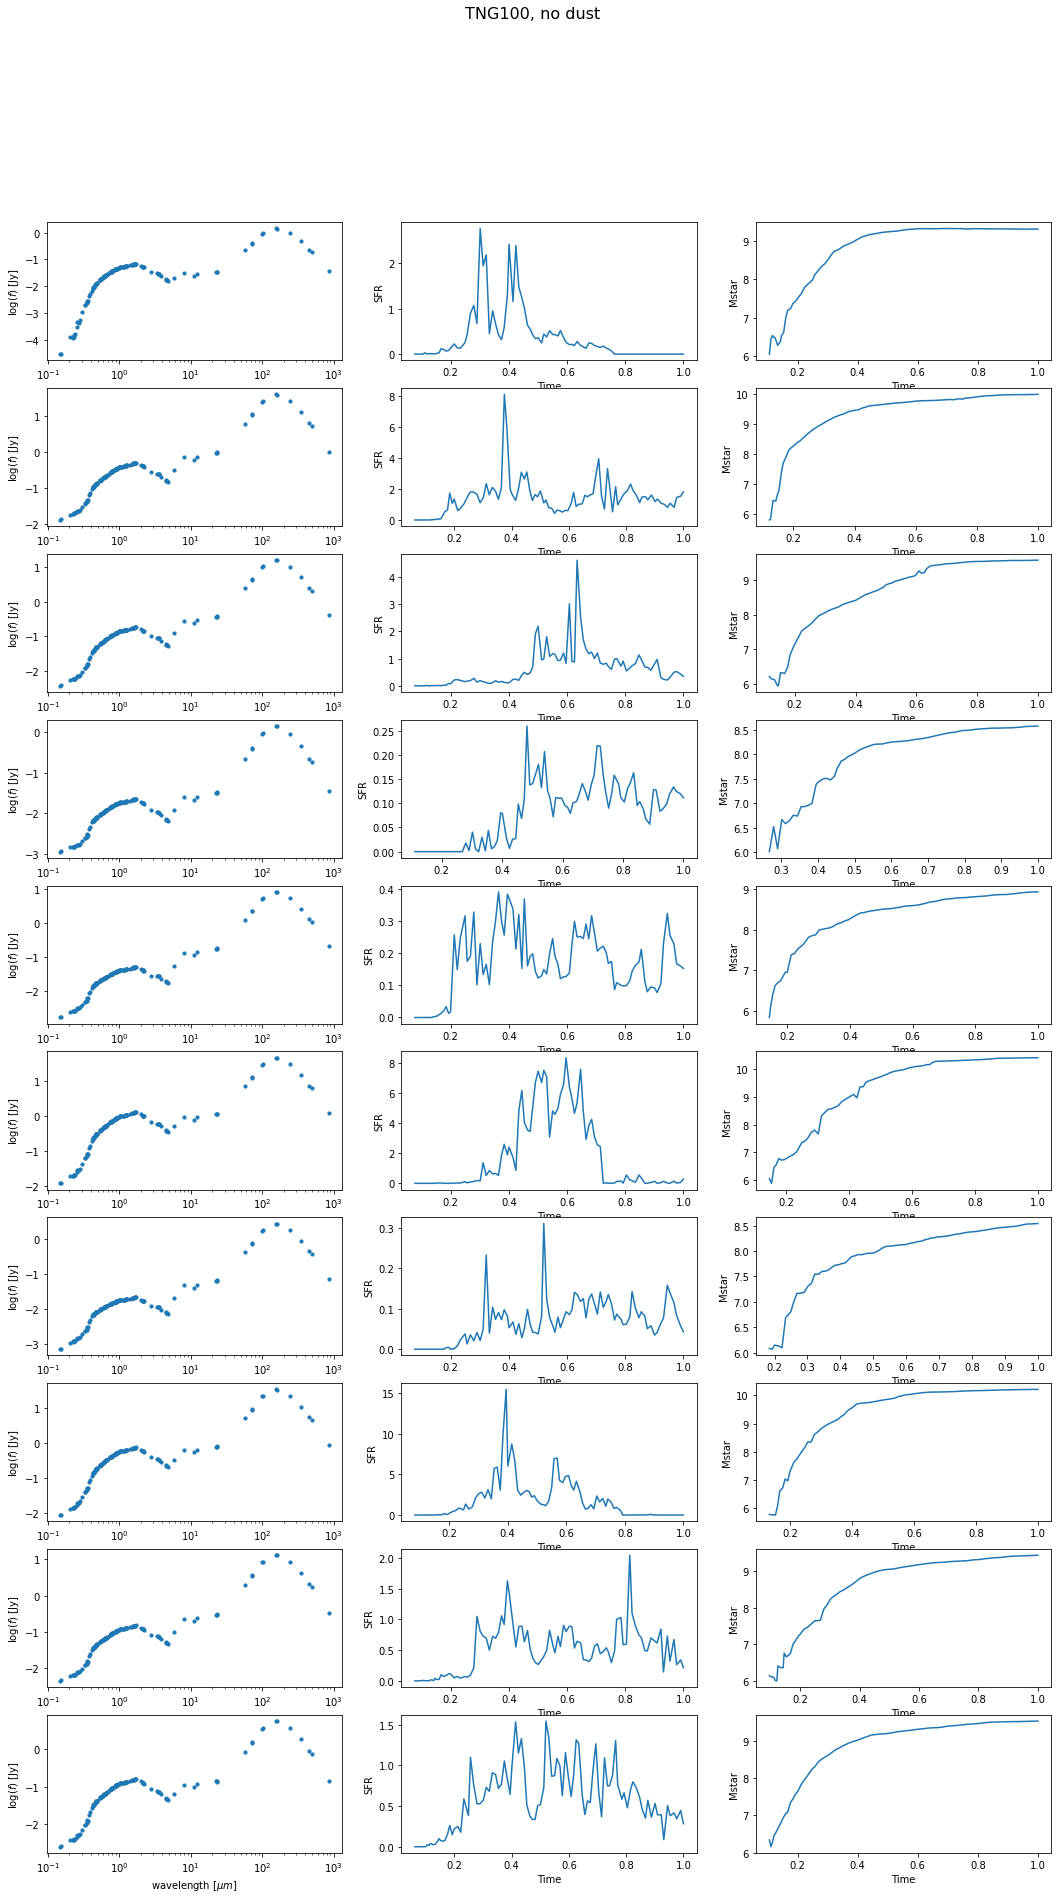

In [ ]:
# load catalogs
cat_path = "/content/data/phot_TNG100_dylan_143.csv"
phot_cat = pd.read_csv(cat_path)
sfh_path = "/content/data/cats_SFH/"
wl = loadtxt('/content/data/wl.csv', delimiter=',')/10**4

#index pandas table
shids = phot_cat['subhaloIDs']
phot_cat.set_index("subhaloIDs", inplace=True)
phot_cat.head()

#plot figures
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(18, 30)
fig.suptitle("TNG100, no dust", fontsize=16)
for index in range(10):
    sh = int(shids[index+random.randint(0,high=len(shids)-20)])
    obj=phot_cat.loc[sh][:]
    #apparent mags
    app_mag = obj.values+5*(np.log10(20e6)-1) #assume at 20pc
    flux = 10**(.4*(-app_mag[np.array(wl)<10**3]+8.90)) #convert to Jy
    axs[index, 0].scatter(np.array(wl)[np.array(wl)<10**3],np.log10(flux),s=10)
    axs[index, 0].set_xlabel("wavelength [$\mu m$]")
    axs[index, 0].set_xscale('log')
    try:
      sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(sh)+".csv")
    except:
      continue  
    axs[index, 0].set_ylabel("$\log(f)$ [Jy]")
    axs[index, 1].set_xlabel("Time")
    axs[index, 1].set_ylabel("SFR")
    axs[index, 1].plot(sfh.time,sfh.SFR_halfRad)
    axs[index, 2].plot(sfh.time,np.log10(sfh.Mstar_Half)+10)
    axs[index, 2].set_xlabel("Time")
    axs[index, 2].set_ylabel("Mstar")
plt.savefig("/content/data/TNG100_examples.pdf")

In [ ]:


shid=1

#noiseless image
image_path = "/content/data/images/TNG100/sdss/sn99/noiseless"
image_file = image_path+'/broadband_'+str(int(shid))+'.fits'
image_data = fits.getdata(image_file, ext=0)
fig=plt.figure()
fig.suptitle("Noiseless image", fontsize=16)
norm = simple_norm(image_data[3,:,:], 'sqrt')
shape = image_data[3,:,:].shape
print(shape)
plt.imshow(image_data[3,int(shape[0]/2)-64:int(shape[0]/2)+64,int(shape[1]/2)-64:int(shape[1]/2)+64], cmap='gray',norm=norm)
plt.colorbar()



**List the files**

In [ ]:
print("Number of files in the g-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/g/")))
print("Number of files in the i-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/i/")))
print("Number of files in the r-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/r/")))
print("Number of files in the z-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/z/")))

Number of files in the g-band 11362
Number of files in the i-band 11366
Number of files in the r-band 11372
Number of files in the z-band 11376


In [ ]:
g_band=os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/g/")

In [ ]:
g_band[1]

In [ ]:
def show_img(image_path,shid,band):
  image_file = image_path+'/broadband_'+str(int(shid))+"_FullReal.fits_"+band+"_band_FullReal.fits"
  image_data = fits.getdata(image_file, ext=0)
  fig=plt.figure()
  fig.suptitle("Noiseless image in "+band+" band", fontsize=16)
  norm = simple_norm(image_data, 'sqrt')
  plt.imshow(image_data,cmap='gray',norm=norm)
  plt.colorbar()
  return 0

0

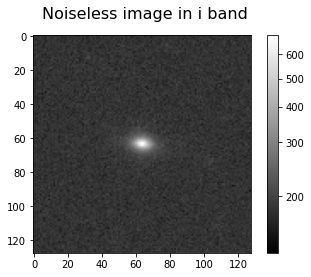

In [ ]:
band="i"
image_path="/content/data/images/TNG100/sdss/sn99/Outputs/"+band
shid=100
show_img(image_path,shid,band)

In [ ]:
def sph_keep_only_compmete_filterset():
  """
  returns a list of correct indices
  """
  from os.path import exists
  goodim_list=[]
  image_path_gene = "/content/data/images/TNG100/sdss/sn99/"
  image_path_noisy = image_path_gene + "/Outputs"
  image_path_noiseless = image_path_gene + "/noiseless"
  for count in range(1,12000):
    if exists(image_path_noisy/+'i/broadband_'+str(int(count))+"_FullReal.fits_i_band_FullReal.fits") and \
      exists(image_path_noisy/+'r/broadband_'+str(int(count))+"_FullReal.fits_r_band_FullReal.fits") and \
      exists(image_path_noisy/+'g/broadband_'+str(int(count))+"_FullReal.fits_g_band_FullReal.fits") and \
      exists(image_path_noisy/+'z/broadband_'+str(int(count))+"_FullReal.fits_z_band_FullReal.fits") and \
      exists(image_path_noiseless/+'/broadband_'+str(int(count))+'.fits'):
        goodim_list.append(count)
  return(goodim_list)

In [ ]:
kept_images=sph_keep_only_compmete_filterset()

TypeError: ignored

Create TF dataset

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [ ]:
!tfds new tng100_images

2021-12-06 17:38:46.159975: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Traceback (most recent call last):
  File "/usr/local/bin/tfds", line 8, in <module>
    sys.exit(launch_cli())
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/scripts/cli/main.py", line 61, in launch_cli
    app.run(main, flags_parser=_parse_flags)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/scripts/cli/main.py", line 56, in main
    args.subparser_fn(args)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/scripts/cli/new.py", line 95, in _create_dataset_files
    create_dataset_files(dataset_name=args.dataset_name, dataset_dir=args.dir)
  File "/usr/local/li

In [ ]:
os.listdir("/content/tng100_images")

['dummy_data',
 '__init__.py',
 'checksums.tsv',
 'tng100_images_test.py',
 'tng100_images.py']

In [ ]:
open("/content/tng100_images/tng100_images.py")

<_io.TextIOWrapper name='/content/tng100_images/tng100_images.py' mode='r' encoding='UTF-8'>

In [85]:
%load /content/tng100_images/tng100_images.py

In [ ]:
#save ensuite